In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
X = np.concatenate([np.random.normal(loc=0, scale=1, size=(300, 2)), np.zeros((300, 1))], axis=1)

In [75]:
mus = [3, (6, 10)]

for i, e in enumerate(mus):
    Y = np.concatenate([np.random.normal(loc=e, scale=1, size=(300, 2)), (i+1) * np.ones((300, 1))], axis=1)
    X = np.vstack((X, Y))

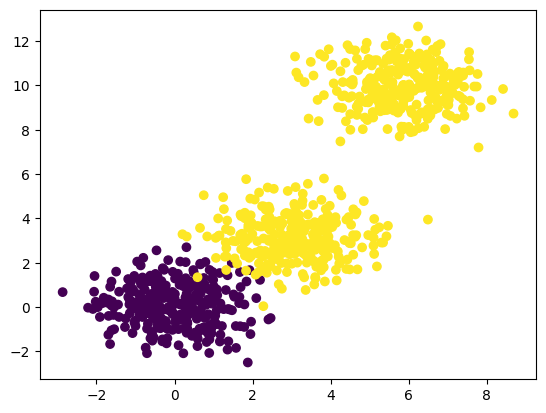

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2])
# plt.scatter(Y[:, 0], Y[:, 1])
# plt.axline((0, 0), None, slope=3, color="red")
plt.show()

In [42]:
Y = (X[:, 1] > 3 * X[:, 0]).astype(float).reshape(-1, 1)
Y

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

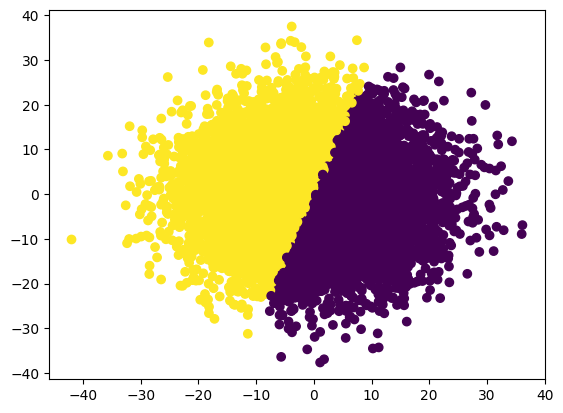

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0])

In [44]:
df = np.hstack([X, Y])

In [45]:
df.shape

(10000, 3)

In [46]:
np.savetxt("points.csv", df, delimiter=",")

In [33]:
df.tofile("tofile.csv", sep=",")

In [38]:
X = pd.read_csv("Supervised_learning/points.csv").to_numpy()

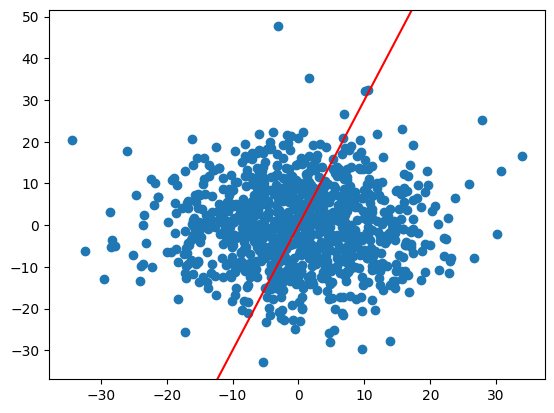

In [39]:
plt.scatter(X[:, 0], X[:, 1])
plt.axline((0, 0), None, slope=3, color="red")
plt.show()

In [33]:
# X.shape
pd.read_csv("Supervised_learning/points.csv", delimiter=",", header=None)

,0,1,2
0,-0.860046,-0.301570,1.0
1,1.620384,0.292759,0.0
2,-0.344888,-0.520897,1.0
3,-1.127986,0.673936,1.0
4,1.003821,-1.281699,0.0
...,...,...,...
75,0.262436,0.285135,0.0
76,0.314281,0.145114,0.0
77,0.226533,0.012603,0.0
78,-0.013607,0.113357,1.0


In [4]:
from Supervised_learning.DL.ANN.ANN import ANN, CNN

ann = ANN(2, 1)

In [5]:
X[0]

array([1.6203837, 0.2927592, 0.       ])

In [12]:
import torch

In [14]:
(ann(X[0, :2]) > 0.5).type(torch.int)

tensor([1], dtype=torch.int32)

In [15]:
print(ann(X[0:2, :2]))

tensor([[0.5184],
        [0.5005]], grad_fn=<SigmoidBackward0>)


In [16]:
X[:2]

array([[ 1.6203837 ,  0.2927592 ,  0.        ],
       [-0.34488846, -0.52089661,  1.        ]])

In [1]:
import torchvision.datasets as vset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
trans = transforms.Compose([transforms.ToTensor()])

In [4]:
dataset = vset.MNIST(root='MNIST/data', transform=trans, download=True)

In [32]:
x, y = dataset[3]
x.shape, y

(torch.Size([1, 28, 28]), 1)

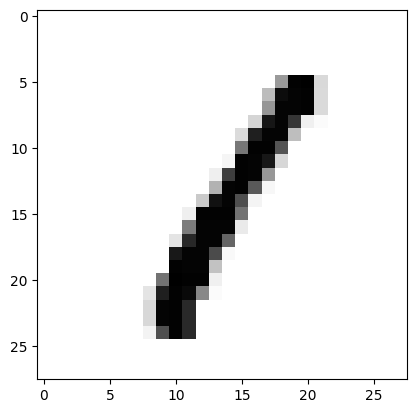

In [34]:
plt.imshow(np.stack(x, axis=-1), cmap='Greys')
# np.stack(x, axis=-1).shape

In [7]:
loader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

In [8]:
for i, (x, y) in enumerate(loader):
	print(x.shape, y.shape)
	break

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [9]:
from Supervised_learning.DL.CNN.CNN import CNN

Files already downloaded and verified


In [10]:
import torch

In [11]:
cnn = CNN(x)

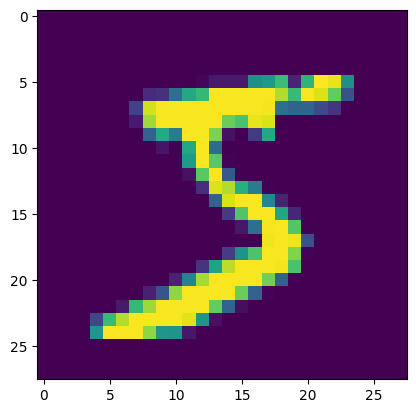

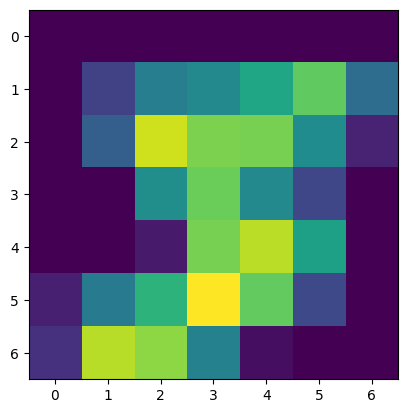

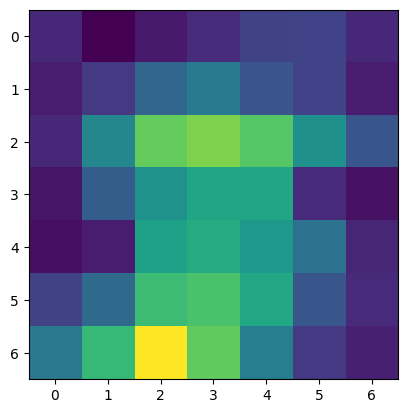

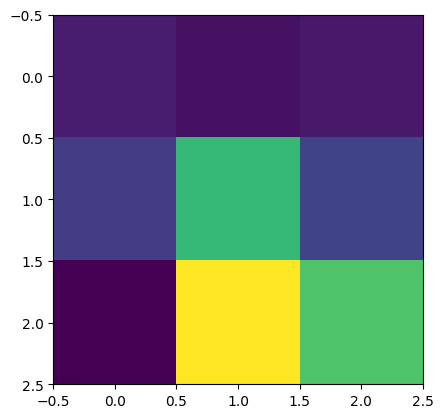

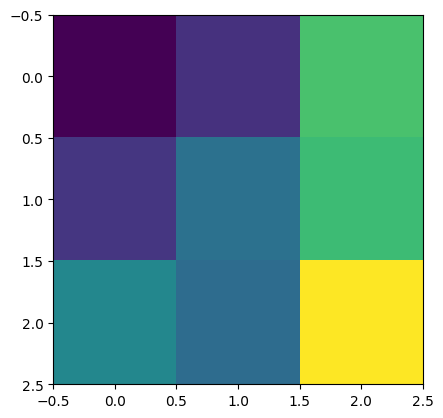

torch.Size([1, 450])


In [99]:
# cnn.layer1(x[0].unsqueeze(dim=0))
x, y = dataset[0]
x_plot = np.stack(x, axis=-1)

l1 = cnn.layer1(x.unsqueeze(dim=0))
l2 = cnn.layer2(l1)
l3 = cnn.layer3(l2)
l4 = cnn.layer4(l3)
z = cnn.encode(x.unsqueeze(dim=0))


plt.imshow(x_plot)
plt.show()

plt.imshow(l1[0].mean(dim=0).detach().numpy())
plt.show()

plt.imshow(l2[0].mean(dim=0).detach().numpy())
plt.show()

plt.imshow(l3[0].mean(dim=0).detach().numpy())
plt.show()

plt.imshow(l4[0].mean(dim=0).detach().numpy())
plt.show()

print(z.shape)

In [ ]:
cnn.train_model(train_dataloader=loader)

In [22]:
# x = torch.rand(1, 3, 32, 32)
o = cnn(x[0].unsqueeze(dim=0))
print(o)
cnn.predict(x[0].unsqueeze(dim=0))

tensor([[0.1314, 0.1039, 0.0908, 0.0862, 0.0902, 0.0886, 0.1256, 0.0860, 0.0798,
         0.1174]], grad_fn=<SoftmaxBackward0>)


tensor([0])

In [10]:
o.argmax(axis=-1)

tensor([8])

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder


In [12]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128 pixels
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with mean and std for pre-trained models
])


In [13]:
data_dir = 'Supervised_learning/dataset/training_set'

dataset = ImageFolder(root=data_dir, transform=transform)


In [43]:
batch_size = 128
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [44]:
next(iter(dataloader))[0][:1].shape

torch.Size([1, 3, 128, 128])

In [45]:
cnn = CNN(next(iter(dataloader))[0][:1], out_features=2)

In [46]:
# next(iter(dataloader))

In [ ]:
# cnn(next(iter(dataloader))[0])
# next(iter(dataloader))[0].shape

for x, y in dataloader:
    print(cnn(x).shape)

